#### Graph view layer
a backend in memory graph mapped to  BIOPAX datasets to allow in memory manipulation


In [1]:

import networkx as nx
import operator
import matplotlib.pyplot as plt
from biopax_explorer.graph import view

In [15]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [16]:
gl= view.GraphModelLayer()
modelfile='data/output/graphlayer.graphml'
gl.write_graphml(modelfile)

##### Graph layer on the BIOPAX model


model entities in graph
{'1': 'RelationshipXref', '2': 'RelationshipTypeVocabulary', '3': 'ProteinReference', '4': 'EntityFeature', '5': 'EntityReferenceTypeVocabulary', '6': 'Evidence', '7': 'EntityReference', '8': 'Xref', '9': 'BioSource', '10': 'BiochemicalReaction', '11': 'Provenance', '12': 'InteractionVocabulary', '13': 'Entity', '14': 'PhysicalEntity', '15': 'Stoichiometry', '16': 'DeltaG', '17': 'KPrime', '18': 'RnaRegion', '19': 'CellularLocationVocabulary', '20': 'ModificationFeature', '21': 'SequenceLocation', '22': 'SequenceRegionVocabulary', '23': 'SequenceModificationVocabulary', '24': 'TransportWithBiochemicalReaction', '25': 'Complex', '26': 'PublicationXref', '27': 'Pathway', '28': 'Interaction', '29': 'PathwayStep', '30': 'TemplateReactionRegulation', '31': 'Conversion', '32': 'ComplexAssembly', '33': 'CovalentBindingFeature', '34': 'BindingFeature', '35': 'DnaReference', '36': 'DnaRegionReference', '37': 'SequenceSite', '38': 'TemplateReaction', '39': 'DnaRegion', '4

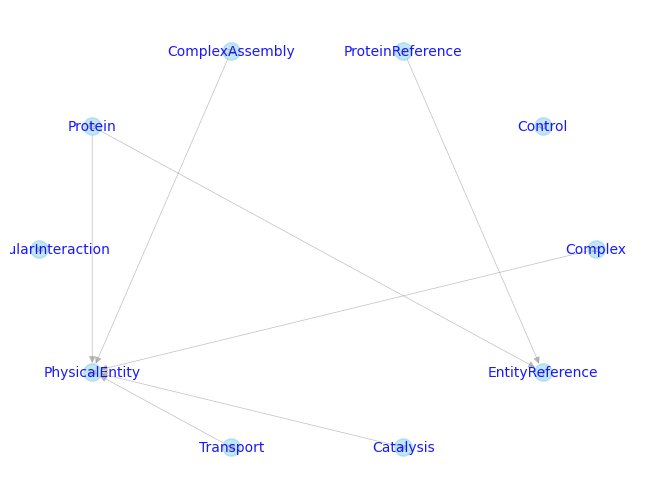

In [17]:

graph_all = nx.read_graphml(modelfile)

print("model entities in graph")
labels = {}    
for node, data in graph_all.nodes(data=True):
   labels[node] = data['name']
        
print(labels)
print("we select a subset of the entities")
st=['PhysicalEntity','Protein','Complex','ComplexAssembly','EntityReference','Control','Transport','Catalysis','MolecularInteraction','ProteinReference']
selected_nodes = [n for n,v in graph_all.nodes(data=True) if v['name'] in st   ]  


print("we draw the sub graph")

G = graph_all.subgraph(selected_nodes)

pos=nx.circular_layout(G)


nx.draw(G,pos, with_labels=True, node_size=155, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=1, font_size=5, 
        font_color="grey", font_weight="bold", width=0.5, edge_color="grey", arrows=True)

 
labels = {}    
for node, data in G.nodes(data=True):
   labels[node] = data['name']
        
print(labels)
nx.draw_networkx_labels(G,pos, labels,font_size=10,alpha=0.9 ,font_color='blue')

plt.show()

##### Graph layer on a BIOPAX dataset

In [18]:

 
gl=view.Factory(back="NX").graphDatasetLayer()
print(type(gl))

<class 'biopax_explorer.graph.view.GraphDatasetLayerNX'>


In [ ]:

 

dataset="g6p"
db="http://db:3030"
from biopax_explorer.biopax.utils import gen_utils as gu

dburl=db+"/%s/query"
gl.model_instance_dict=gl.mpop.populate_domain_instance(dburl,dataset,gu.prefix(),gu.domain())
 
#gl.populate_dataset(db,dataset)
print("-----")
ct=0
collec=[]
maxct=10 
st=['Protein','SmallMolecule']
gl.g = gl.newGraph()
for pk in gl.model_instance_dict.keys():
        
   #print(pk) 
   inst=gl.model_instance_dict[pk] 
   
   if inst.__class__.__name__ in  st:
         
     ct=ct+1
     if ct<=maxct:
       collec.append(inst) 
       print("uri:",inst.pk)   
 
##########################
#print(collec) 
gl.build(collec)
print("number of nodes:",len(gl.g.nodes))
gl.write_graphml('data/output/datasetlayer.graphml')
gl.write_gexf('data/output/datasetlayer.gexf')
print("-----")


In [7]:
print(gl.g)
G=gl.g
 
pos=nx.circular_layout(G)



 
labels = {}    
colors =  []  
for node, ndata in G.nodes(data=True):
   print("-->",node)   
   asl=0 
 
   tp=ndata["ctype"]
   if tp=='SmallMolecule' :
       colors.append('grey')
   else:
       colors.append('skyblue')
   for k in ["name","displayName"] :
    #print(data)  
     
     #labels[node] = ""# data['uri']  
     if asl==0 :
       if k in  ndata.keys() and ndata[k] !='' :
          #print(ndata[k],"!!!")
          labels[node] = ndata[k] +" ("+tp+")"
          asl=1 
          if "http:" in labels[node] :
              asl=0
       if asl==0:
          labels[node] = tp +str(node) #+" "+ndata['uri']
        
#print(labels) 
nx.draw(G,pos, with_labels=True, node_size=155,  node_color=colors,  node_shape="o", alpha=0.5, linewidths=1, font_size=5, 
        font_color="grey", font_weight="bold", width=0.5, edge_color="grey", arrows=True)

nx.draw_networkx_labels(G,pos, labels,font_size=6,alpha=0.9 ,font_color='blue')

plt.show()

Graph with 24 nodes and 30 edges
--> 1
--> 2
--> 3
--> 4
--> 5
--> 6
--> 7
--> 8
--> 9
--> 10
--> 11
--> 12
--> 13
--> 14
--> 15
--> 16
--> 17
--> 18
--> 19
--> 20
--> 21
--> 22
--> 23
--> 24


In [8]:
# compute shortest path between biopax entities as nodes / by URI
#print(gl.g.nodes)
ix=0
uri1=""
uri2=""
# first we select 2 entity URIs
for n, d in gl.g.nodes(data=True):
    ix=ix+1
    #print(n,d)
    if ix==1:
      uri1=d['uri']
      print(uri1)
    if ix==2:
      uri2=d['uri']
      print(uri2)
 

    
nl1=gl.selectNodeByAttributeValue("uri",uri1)
nl2=gl.selectNodeByAttributeValue("uri",uri2)
print(gl.g)
print(nl1)
print(nl2)
print("paths:")
for path in gl.k_shortest_paths(nl1[0],  nl2[0],10):
    print(path)
print("==========")
 


http://www.reactome.org/biopax/56/71387#SmallMolecule87
http://www.reactome.org/biopax/56/71387#Provenance1
Graph with 24 nodes and 30 edges
[1]
[2]
paths:
[1, 2]
[1, 4, 5, 2]
[1, 4, 12, 2]
[1, 4, 14, 2]
[1, 4, 16, 2]


In [9]:
print("graph traversal")
print("---------Breadth First Search----------")
ct=0
for e in nx.edge_bfs(gl.g, source=nl1[0], orientation=None):
    ct+=1
    print(e)
    if ct==10:
        break

print("---------Depth First Search----------")
ct=0
for e in nx.edge_dfs(gl.g, source=nl1[0], orientation=None):
    ct+=1
    print(e)
    if ct==10:
        break

graph traversal
---------Breadth First Search----------
(1, 2)
(1, 3)
(1, 4)
(2, 5)
(2, 7)
(2, 10)
(2, 12)
(2, 14)
(2, 16)
(2, 18)
---------Depth First Search----------
(1, 2)
(2, 5)
(5, 6)
(5, 4)
(4, 1)
(1, 3)
(4, 12)
(12, 2)
(2, 7)
(7, 8)


In [10]:
# filter graph edge and node by nodes 
#filter  -- by edges
def filter_by_node_att_val(g ):
     edge_color_list=[]
     edges=list( g.edges(data=True))
     for e in edges: 
      
       #srcid=g.nodes(e[0])
       #tgtid=g.nodes(e[1]) 
       edge_attl=e[2]
      
       n1=g.nodes(e[0])
       #print(n1)
       #if e[2][att]<thresh: 
       #  self.g.remove_edge(*e[:2])   

ng=filter_by_node_att_val(gl.g)

In [11]:



op_edge=operator.lt
#operator.le(a, b)
op_node=operator.ne
# eq,ne ,ge,gt,lt


final_view= gl.filter_graph(edge_att="weight",edge_val=15,node_att='displayName',node_val=['AMP','Mg2+'],op_edge=op_edge,op_node=op_node)
#final_view= filter_graph(gl,edge_att="weight",edge_val=10)
#final_view= filter_graph(gl,node_att='name',node_val='AMP')

print(final_view)
#print(final_view.nodes())
print("-------nodes------")
ct=0
for n,attv in final_view.nodes(data=True):  
    ct+=1
    print(n ,  attv)    
    if ct>10:
        break
#print(final_view.edges())
print("------edges------")
ct=0
for n1,n2,attv in final_view.edges(data=True): 
    ct+=1
    print(n1,n2,attv)    
    if ct>10:
        break 


Graph with 24 nodes and 30 edges
-------nodes------
1 {'name': 'G1P', 'pk': 'http://www.reactome.org/biopax/56/71387#SmallMolecule87', 'rdf_type': 'http://www.biopax.org/release/biopax-level3.owl#SmallMolecule', 'ctype': 'SmallMolecule', 'uri': 'http://www.reactome.org/biopax/56/71387#SmallMolecule87', 'availability': '', 'displayName': 'G1P', 'standardName': 'G1P'}
2 {'name': 'Reactome', 'pk': 'http://www.reactome.org/biopax/56/71387#Provenance1', 'rdf_type': 'http://www.biopax.org/release/biopax-level3.owl#Provenance', 'ctype': 'Provenance', 'uri': 'http://www.reactome.org/biopax/56/71387#Provenance1', 'availability': None, 'displayName': 'Reactome', 'standardName': ''}
3 {'name': 'http://www.reactome.org/biopax/56/71387#UnificationXref_reactome_database_id_release_56_29548', 'pk': 'http://www.reactome.org/biopax/56/71387#UnificationXref_reactome_database_id_release_56_29548', 'rdf_type': 'http://www.biopax.org/release/biopax-level3.owl#UnificationXref', 'ctype': 'UnificationXref', '

In [12]:
for n, d in gl.g.nodes(data=True):
    print(list(d.keys()))
    break

['name', 'pk', 'rdf_type', 'ctype', 'uri', 'availability', 'displayName', 'standardName']


In [13]:

rina=gl.revIndexNodeAttValues()
rina['displayName']

{'G1P': [1],
 'Reactome': [2],
 'G6P': [5, 10, 21],
 'ADP': [7, 16],
 'H+': [12],
 'ATP': [14],
 'Pi': [18],
 'H2O': [23]}

In [14]:
ina=gl.indexNodeAttValues()

nid=1
ina[nid]

{'name': 'G1P',
 'pk': 'http://www.reactome.org/biopax/56/71387#SmallMolecule87',
 'rdf_type': 'http://www.biopax.org/release/biopax-level3.owl#SmallMolecule',
 'ctype': 'SmallMolecule',
 'uri': 'http://www.reactome.org/biopax/56/71387#SmallMolecule87',
 'availability': '',
 'displayName': 'G1P',
 'standardName': 'G1P'}